In [2]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [3]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '262626',
    database = 'sakila'
)

In [4]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    df = pd.DataFrame(result, columns=curs.column_names)
    return df

In [8]:
# Dataframe

df = sql_table (
'''
select s.store_id as store, 
DATE_FORMAT(r.rental_date, "%Y-%m") as yearmonth ,
rental_date, return_date,
count(*) as total_rental, 
count(distinct r.customer_id) as total_customer, 
round(sum(amount)) as total_income 
from rental r
join staff s
on s.staff_id = r.staff_id
join payment p
  on p.rental_id = r.rental_id
group by yearmonth , s.store_id
order by s.store_id, yearmonth;
'''
)
df.head(10)

,store,yearmonth,rental_date,return_date,total_rental,total_customer,total_income
0,1,2005-05,2005-05-24 22:53:30,2005-05-26 22:04:30,558,372,2340
1,1,2005-06,2005-06-14 22:55:13,2005-06-17 02:11:13,1163,507,4832
2,1,2005-07,2005-07-28 07:26:14,2005-08-03 07:45:14,3342,599,14062
3,1,2005-08,2005-08-22 12:01:16,2005-08-27 17:48:16,2892,594,12072
4,1,2006-02,2006-02-14 15:16:03,NaT,85,81,218
5,2,2005-05,2005-05-29 16:44:08,2005-06-06 19:21:08,598,374,2483
6,2,2005-06,2005-06-21 01:00:25,2005-06-23 06:10:25,1148,520,4798
7,2,2005-07,2005-07-11 09:23:56,2005-07-15 10:56:56,3367,595,14307
8,2,2005-08,2005-08-01 00:08:01,2005-08-09 18:14:01,2794,596,11998
9,2,2006-02,2006-02-14 15:16:03,NaT,97,91,296


In [9]:
# Total Rental per month (Aggregating)

tabel1 = sql_table (
    '''
select s.store_id as store, 
DATE_FORMAT(r.rental_date, "%Y-%m") as yearmonth ,
count(*) as total_rental
from rental r
join staff s
on s.staff_id = r.staff_id
group by yearmonth , s.store_id
order by s.store_id,yearmonth; 
    '''
)
tabel1.head(10)

,store,yearmonth,total_rental
0,1,2005-05,558
1,1,2005-06,1163
2,1,2005-07,3342
3,1,2005-08,2892
4,1,2006-02,85
5,2,2005-05,598
6,2,2005-06,1148
7,2,2005-07,3367
8,2,2005-08,2794
9,2,2006-02,97


In [10]:
# Total Customer per month (Aggregating)

tabel2 = sql_table(
    '''
select c.store_id as store,
DATE_FORMAT(r.rental_date, "%Y-%m") as yearmonth ,
count(distinct r.customer_id) as total_customer 
from rental r
join customer c
on c.customer_id = r.customer_id
group by yearmonth , c.store_id
order by c.store_id, yearmonth; 
    '''
)

tabel2.head(10)

,store,yearmonth,total_customer
0,1,2005-05,281
1,1,2005-06,320
2,1,2005-07,326
3,1,2005-08,326
4,1,2006-02,84
5,2,2005-05,239
6,2,2005-06,270
7,2,2005-07,273
8,2,2005-08,273
9,2,2006-02,74


In [11]:
# Total Income per month (Aggregating)

tabel3 = sql_table(
    '''
select s.store_id as store,
DATE_FORMAT(r.rental_date, "%Y-%m") as yearmonth ,
round(sum(amount)) as total_income 
from payment p
join rental r 
  on p.rental_id = r.rental_id 
join staff s
  on s.staff_id = r.staff_id
group by yearmonth , s.store_id
order by s.store_id, yearmonth;
'''
)
tabel3.head(10)

,store,yearmonth,total_income
0,1,2005-05,2340
1,1,2005-06,4832
2,1,2005-07,14062
3,1,2005-08,12072
4,1,2006-02,218
5,2,2005-05,2483
6,2,2005-06,4798
7,2,2005-07,14307
8,2,2005-08,11998
9,2,2006-02,296


In [12]:
# Check Info Tabel

df.info()
tabel1.info()
tabel2.info()
tabel3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   store           10 non-null     int64         
 1   yearmonth       10 non-null     object        
 2   rental_date     10 non-null     datetime64[ns]
 3   return_date     8 non-null      datetime64[ns]
 4   total_rental    10 non-null     int64         
 5   total_customer  10 non-null     int64         
 6   total_income    10 non-null     object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 688.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   store         10 non-null     int64 
 1   yearmonth     10 non-null     object
 2   total_rental  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.

In [13]:
# Check Missing Value Percentage

df.isnull().sum()

store             0
yearmonth         0
rental_date       0
return_date       2
total_rental      0
total_customer    0
total_income      0
dtype: int64

In [14]:
# Remove Missing Value 1
df.dropna(axis=0)

,store,yearmonth,rental_date,return_date,total_rental,total_customer,total_income
0,1,2005-05,2005-05-24 22:53:30,2005-05-26 22:04:30,558,372,2340
1,1,2005-06,2005-06-14 22:55:13,2005-06-17 02:11:13,1163,507,4832
2,1,2005-07,2005-07-28 07:26:14,2005-08-03 07:45:14,3342,599,14062
3,1,2005-08,2005-08-22 12:01:16,2005-08-27 17:48:16,2892,594,12072
5,2,2005-05,2005-05-29 16:44:08,2005-06-06 19:21:08,598,374,2483
6,2,2005-06,2005-06-21 01:00:25,2005-06-23 06:10:25,1148,520,4798
7,2,2005-07,2005-07-11 09:23:56,2005-07-15 10:56:56,3367,595,14307
8,2,2005-08,2005-08-01 00:08:01,2005-08-09 18:14:01,2794,596,11998


In [16]:
# Change Spesific Column To Numeric Format

df['total_income'] = pd.to_numeric(df['total_income'])
tabel3['total_income'] = pd.to_numeric(tabel3['total_income'])

In [17]:
# Recheck Info

df.info()
tabel3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   store           10 non-null     int64         
 1   yearmonth       10 non-null     object        
 2   rental_date     10 non-null     datetime64[ns]
 3   return_date     8 non-null      datetime64[ns]
 4   total_rental    10 non-null     int64         
 5   total_customer  10 non-null     int64         
 6   total_income    10 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 688.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         10 non-null     int64  
 1   yearmonth     10 non-null     object 
 2   total_income  10 non-null     float64
dtypes: float64(1), int64(1),

In [27]:
# Check Duplicate

df[df.duplicated()]

,store,yearmonth,rental_date,return_date,total_rental,total_customer,total_income


In [18]:
# Add New Column (Lama Pinjam)

rental_duration = sql_table(
    '''
select rental_id, staff_id, customer_id , rental_date, 
return_date, DateDiff (return_date,rental_date) as lama_pinjam
from rental order by rental_id;
    '''
)
rental_duration.sample(5)

,rental_id,staff_id,customer_id,rental_date,return_date,lama_pinjam
3864,3867,1,580,2005-07-06 17:52:19,2005-07-13 21:48:19,7.0
4185,4188,1,391,2005-07-07 10:45:29,2005-07-16 09:39:29,9.0
8623,8627,2,226,2005-07-29 14:05:12,2005-08-05 16:53:12,7.0
7953,7957,1,78,2005-07-28 13:34:08,2005-08-05 07:58:08,8.0
15963,15969,1,327,2005-08-23 19:51:30,2005-08-31 23:50:30,8.0


In [19]:
# Check Data Anomalies 

rental_duration['lama_pinjam'].value_counts() 

7.0     1821
2.0     1795
6.0     1783
8.0     1762
5.0     1761
3.0     1714
9.0     1691
4.0     1681
1.0     1644
0.0      105
10.0     104
Name: lama_pinjam, dtype: int64

In [35]:
# Clean Data

df.sample(5)

,store,yearmonth,rental_date,return_date,total_rental,total_customer,total_income
6,2,2005-06,2005-06-21 01:00:25,2005-06-23 06:10:25,1148,520,4798.0
0,1,2005-05,2005-05-24 22:53:30,2005-05-26 22:04:30,558,372,2340.0
1,1,2005-06,2005-06-14 22:55:13,2005-06-17 02:11:13,1163,507,4832.0
7,2,2005-07,2005-07-11 09:23:56,2005-07-15 10:56:56,3367,595,14307.0
8,2,2005-08,2005-08-01 00:08:01,2005-08-09 18:14:01,2794,596,11998.0


In [21]:
# Groupping and Aggregating

df[['store','total_income']].groupby('store').describe()

total_income                                                       \
             count    mean          std    min     25%     50%      75%   
store                                                                     
1              5.0  6704.8  6073.974415  218.0  2340.0  4832.0  12072.0   
2              5.0  6776.4  6089.293415  296.0  2483.0  4798.0  11998.0   

                
           max  
store           
1      14062.0  
2      14307.0

In [22]:
# Outlier Check With Function
Q1_amount = df['total_income'].describe()['25%']
Q3_amount = df['total_income'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = df[(df['total_income'] < Q1_amount - (1.5 * iqr)) | (df['total_income']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = df[(df['total_income'] > Q1_amount - (1.5 * iqr)) & (df['total_income']< Q3_amount + (1.5 * iqr)) ].index
df.loc[outlier_index]

,store,yearmonth,rental_date,return_date,total_rental,total_customer,total_income


# Data Visualization & Statistics

In [23]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

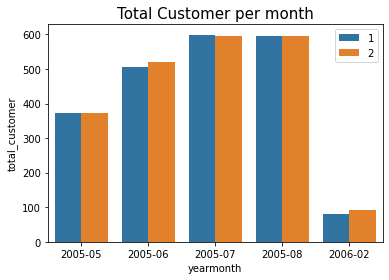

In [25]:
#Total Customer per month each store

sns.barplot(data=df, x="yearmonth", y="total_customer", hue="store")
plt.title('Total Customer per month', size=15)
plt.legend(loc=0)
plt.show()

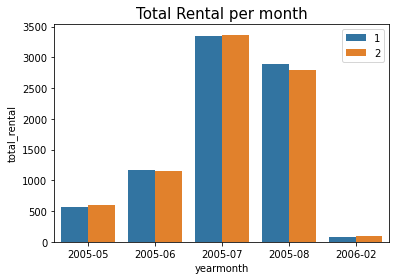

In [26]:
#Total Rental per month each store

sns.barplot(data=df, x="yearmonth", y="total_rental", hue="store")
plt.title('Total Rental per month', size=15)
plt.legend(loc=0)
plt.show()

In [31]:
df['avg_payment'] = df['total_income'] / df['total_customer']
yearprof = df[['yearmonth', 'total_rental' ,'total_income','avg_payment']].groupby(pd.DatetimeIndex(df['yearmonth'])).sum()
yearprof

,total_rental,total_income,avg_payment
yearmonth,,,
2005-05-01,1156,4823.0,12.929360
2005-06-01,2311,9630.0,18.757495
2005-07-01,6709,28369.0,47.521171
2005-08-01,5686,24070.0,40.454105
2006-02-01,182,514.0,5.944105


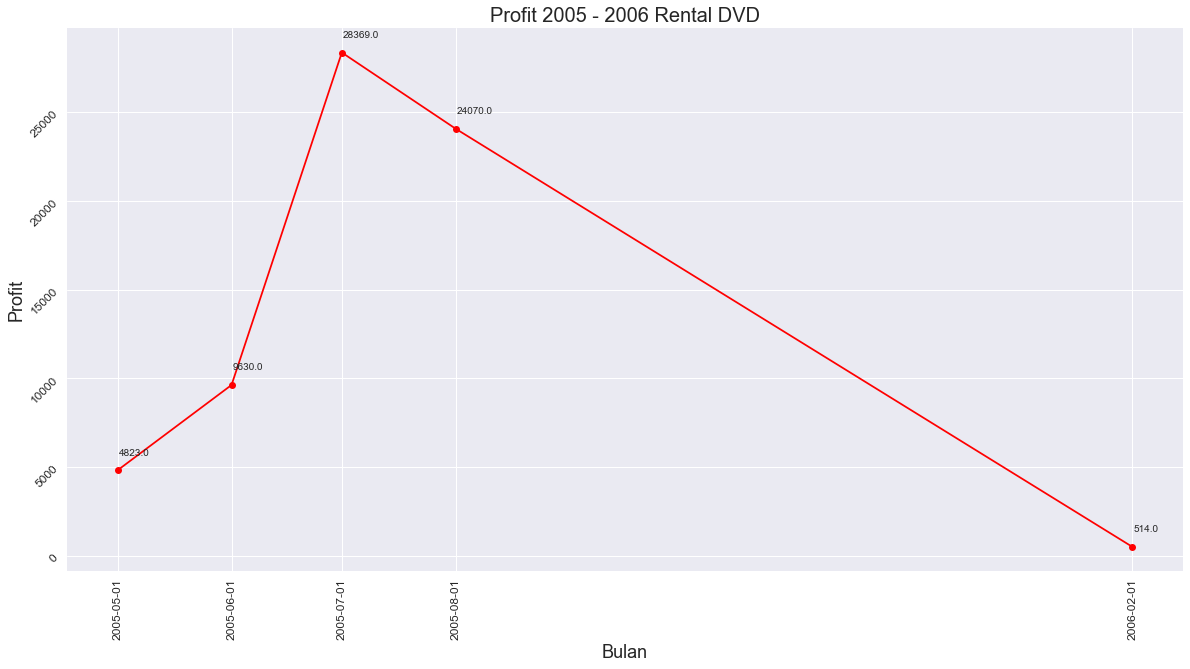

In [32]:
# Line Plot Profit by month

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(yearprof.index, yearprof['total_income'], 'ro-')
plt.title('Profit 2005 - 2006 Rental DVD', size = 20)
plt.xlabel('Bulan', size = 18)
plt.ylabel('Profit', size = 18)
plt.xticks(yearprof.index, rotation = 90, size = 12)
plt.yticks(rotation = 45, size = 12)

for x,y in zip(yearprof.index, round(yearprof['total_income'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15))

plt.show()

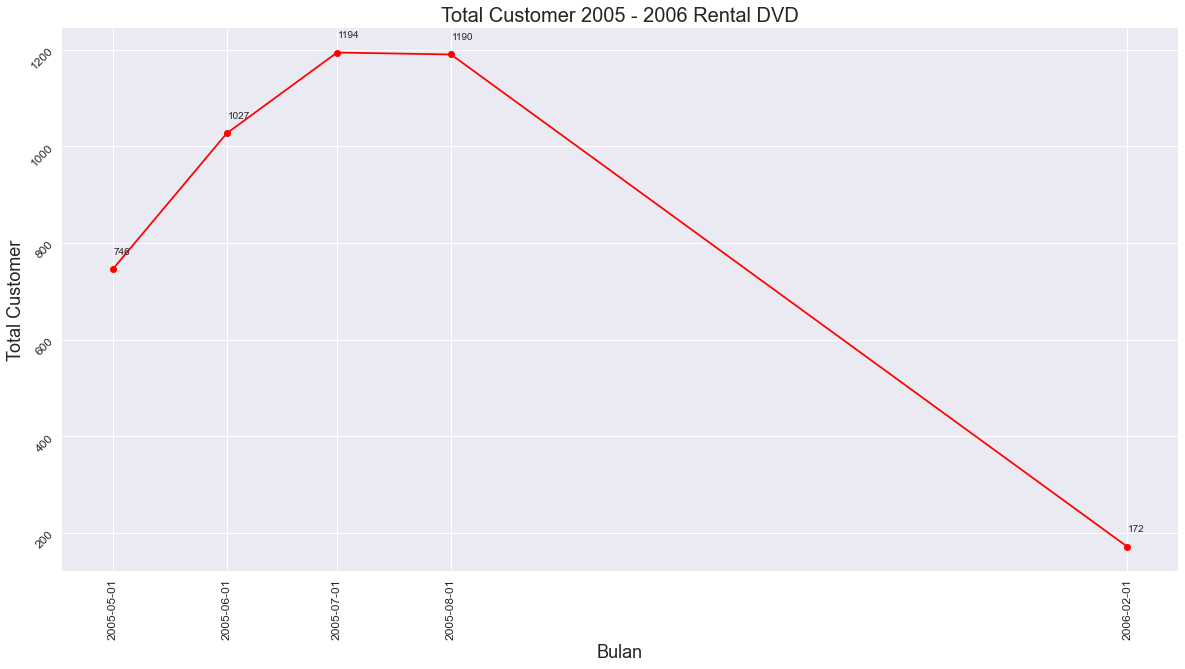

In [109]:
# Line Plot Total Customer by month

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(yearprof.index, yearprof['total_customer'], 'ro-')
plt.title('Total Customer 2005 - 2006 Rental DVD', size = 20)
plt.xlabel('Bulan', size = 18)
plt.ylabel('Total Customer', size = 18)
plt.xticks(yearprof.index, rotation = 90, size = 12)
plt.yticks(rotation = 45, size = 12)

for x,y in zip(yearprof.index, round(yearprof['total_customer'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15))

plt.show()

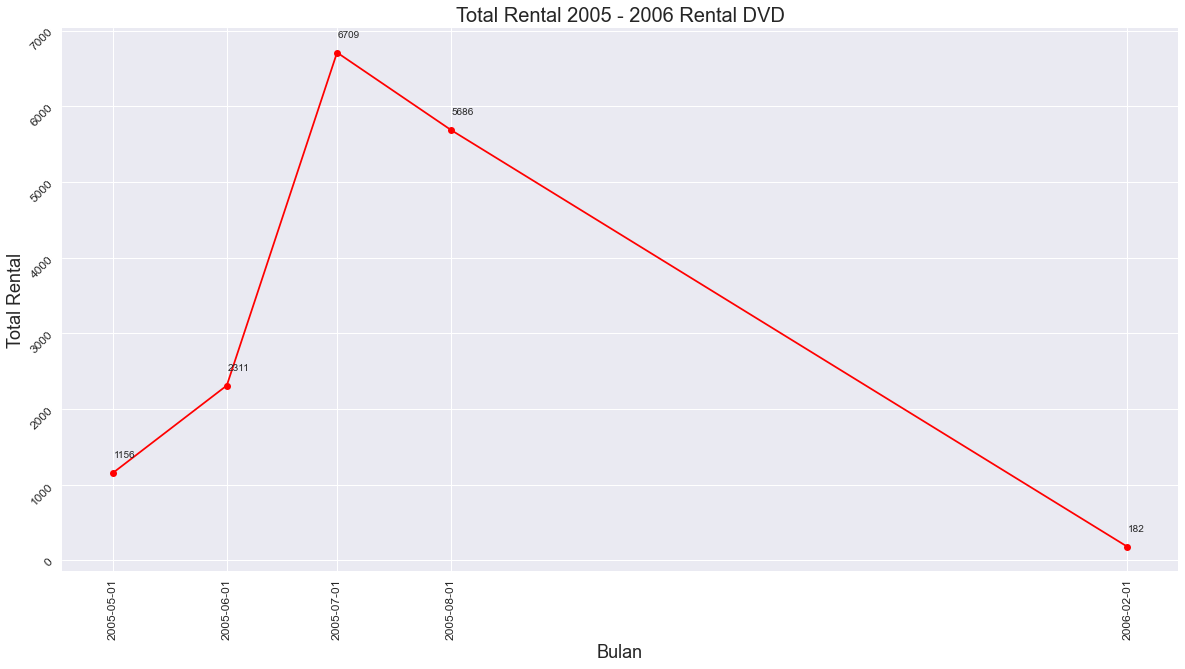

In [33]:
# Line Plot Total Rental by month

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(yearprof.index, yearprof['total_rental'], 'ro-')
plt.title('Total Rental 2005 - 2006 Rental DVD', size = 20)
plt.xlabel('Bulan', size = 18)
plt.ylabel('Total Rental', size = 18)
plt.xticks(yearprof.index, rotation = 90, size = 12)
plt.yticks(rotation = 45, size = 12)

for x,y in zip(yearprof.index, round(yearprof['total_rental'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15))

plt.show()

In [61]:
# Uji Perbandingan Nilai Total Income


from scipy.stats import shapiro

norm, pval = shapiro(df['total_income'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUS NORMAL')

Gagal Tolak H0 Karena P-Value (0.0594894140958786 > 5%)
DATA BERDISTRIBUS NORMAL


<AxesSubplot:>

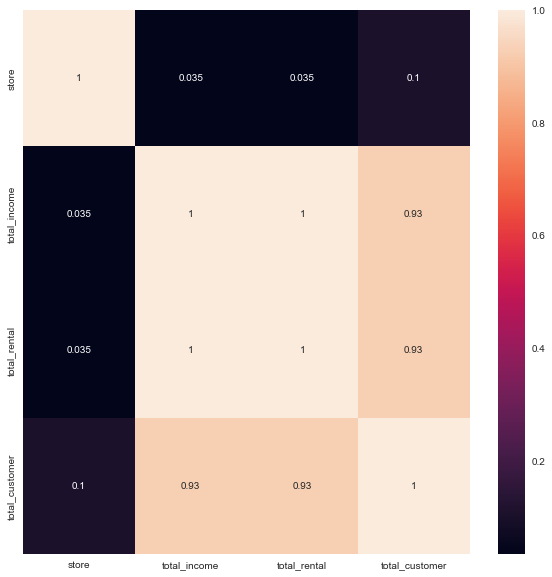

In [35]:
# Korelasi

plt.figure(figsize=(10,10))
sns.heatmap(df[['store', 'total_income', 'total_rental', 'total_customer']].corr('spearman'), annot=True)

C:\Users\irvan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_income', ylabel='total_rental'>

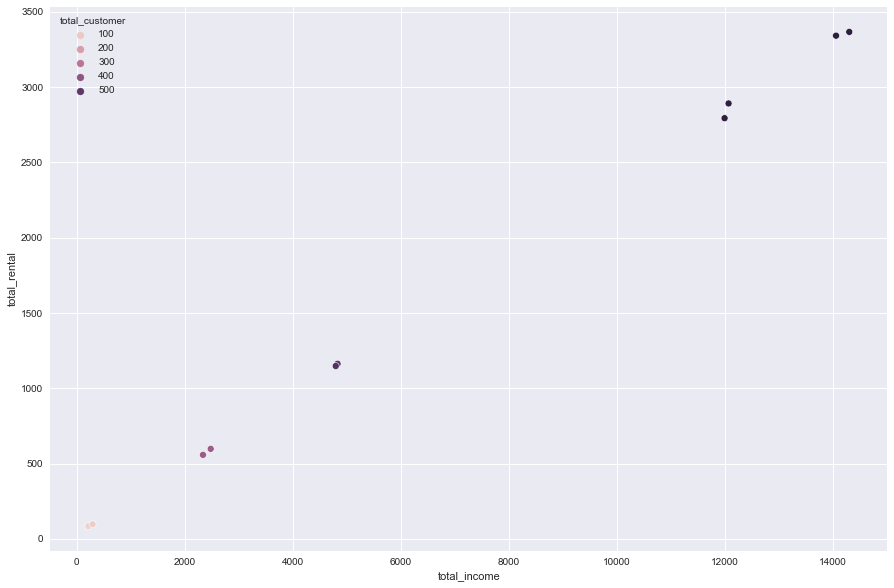

In [43]:
# Korelasi Antara Profit dan Customer

plt.figure(figsize=(15,10))
sns.scatterplot(df['total_income'], df['total_rental'], df['total_customer'])